In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats



### A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    - What is the probability that no cars drive up in the noon hour?
    - What is the probability that 3 or more cars come through the drive through?
    - How likely is it that the drive through gets at least 1 car?

Text(0.5, 1.0, 'Poisson distribution $λ = 1$')

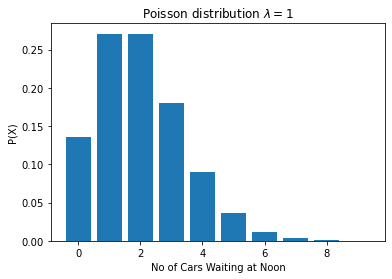

In [135]:
λ = 2

x = np.arange(0,10)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.xlabel('No of Cars Waiting at Noon')
plt.ylabel('P(X)')
plt.title('Poisson distribution $λ = 1$')

In [136]:
# 1b. What is the probability that no cars drive up in the noon hour?

# 14% probability that no cars drive up in the noon hour
stats.poisson(λ).pmf(0).round(2)

0.14

In [137]:
# 1c. What is the probability that 3 or more cars come through the drive through?

# 32% probability that 3 or more cars come through the drive-thru
lambda_of_cars = stats.poisson(λ)
lambda_of_cars.sf(2).round(2)

0.32

In [138]:
# 1d. How likely is it that the drive through gets at least 1 car?
# 86% probability that the drive thru sees at least 1 or more cars

lambda_of_cars.sf(0).round(2)

0.86

### Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    - What grade point average is required to be in the top 5% of the graduating class?
    - What GPA constitutes the bottom 15% of the class?
    - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class
    - Determine the range of the third decile
    - Would a student with a 2.8 grade point average qualify for this scholarship?
    - If I have a GPA of 3.5, what percentile am I in?

In [139]:
# 2. 

mean = 3
std_dev = 0.3

In [140]:
# 2a. What grade point average is required to be in the top 5% of the graduating class?

# 3.49 GPA = top 5% of class
university = stats.norm(mean, std_dev)
university.isf(0.05).round(2)

3.49

In [141]:
# 2b. What GPA constitutes the bottom 15% of the class?

# 2.69 GPA
university.ppf(0.15).round(2)

2.69

In [142]:
#  2d. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile.
# 3rd Decile from Bottom is in range of 2.75 - 2.84 GPA

# Would a student with a 2.8 grade point average qualify for this scholarship?
# Yes, a 2.8 GPA would qualify for this scholarship

bottom_10 = university.ppf(.1) # 2.62 GPA represents the top 10% of class
top_10 = university.isf(.1) # 3.38 GPA represents the top 10% of class

In [143]:
university.ppf((0.2, 0.3))

array([2.74751363, 2.84267985])

In [144]:
# attempting to use numpy's "percentile" method to calculate decile

top_1 = university.isf(0.01)
bottom_1 = university.ppf(0.01)

uni_array = np.array([bottom_1, top_1])
uni_percentiles = np.percentile(uni_array, np.arange(10, 100, 10))
percentiles_df = pd.DataFrame(uni_percentiles)
percentiles_df

,0
0,2.441677
1,2.581257
2,2.720838
3,2.860419
4,3.000000
5,3.139581
6,3.279162
7,3.418743
8,3.558323


In [145]:
# "percentile" approach -- probably not correct? ***

var = np.array([bottom_10, top_10])
quantiles = np.percentile(var, np.arange(0, 101, 10))
quantile_df = pd.DataFrame(quantiles)
quantile_df = quantile_df[0][::-1] # reversing the order of the column, placing highest quantile first in the order

quantile_df

10    3.384465
9     3.307572
8     3.230679
7     3.153786
6     3.076893
5     3.000000
4     2.923107
3     2.846214
2     2.769321
1     2.692428
0     2.615535
Name: 0, dtype: float64

In [146]:
# 2e. If I have a GPA of 3.5, what percentile am I in?

# 95% percentile
university.cdf(3.5).round(2)

0.95

### Problem #3 A marketing website has...
    - an average click-through rate of 2%
    - One day they observe 4326 visitors and 97 click-throughs
    - How likely is it that this many people or more click through?

In [147]:
# 3. binomial distribution

# How likely is it that this many people or more click through?
# 14% probability that there are 97 or more click throughs given the 4326 number of visitors 

n_trials = 4326
p = 0.02

clicks = stats.binom(n_trials, p)
clicks.sf(96).round(2)

0.14

In [148]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.

n_questions = 100
p_questions = 0.50

test = stats.binom(n_questions, p_questions)

test.cdf(60).round(2)

# What is the probability that at least one of your first 60 answers is correct?
# 98% probability that at least one out of the first 60 questions / answers will be correct

# Binomial Distribution --> where there is a "correct" and "incorrect" answer

0.98

In [149]:
# (class walk-thru)

stats.binom(60, 0.01).sf(0).round(2)

0.45

In [150]:
n_trials = 10_000
n_questions = 100
p_questions = 0.50

test = np.random.choice([0, 1], size=(n_trials, n_questions), p = [p_questions, p_questions])

(test[:61].sum(axis=1) >= 1).mean()

1.0

In [151]:
n_trials = 10_000
n_questions = 100
p_questions = 0.50

test = np.random.choice([0, 1], size=(n_trials, n_questions), p = [p_questions, p_questions])

test_df = pd.DataFrame(test)

(test_df.iloc[:,range(0, 61)].sum(axis=1) >= 1).mean()

1.0

 ### The codeup staff tends to get upset when the student break area is not cleaned up. 
 
    - Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day... 
    - About 90% of the 3 active cohorts of 22 students visit the break area
    - How likely is it that the break area gets cleaned up each day? 
    - How likely is it that it goes two days without getting cleaned up? 
    - All week?


In [152]:
# (class walk-thru)
# chance that break-room gets cleaned up at least 1 once daily
# where 90% of 3 cohorts of 22 = 59 students daily 

stats.binom(59, 0.03).sf(0).round(2)

0.83

In [153]:
#  5a.  How likely is it that the break area gets cleaned up each day? 
# 84% chance that the break room is cleaned-up every day

n_trials = 10_000
p = 0.03

# where "0" represents "doesn't clean" and "1" represents "cleans"
cleanup = np.random.choice([0, 1], size=(n_trials, 59), p=[0.97, 0.03])
(cleanup.sum(axis=1) >= 1).mean().round(2)

0.83

In [154]:
#  5b.  How likely is it that it goes two days without getting cleaned? 
# 31% probability that the breakroom goes two (2) without being cleaned

n_trials = 10_000
p = 0.03 # probability that 1 out of the students who visit the break-room will clean

# what am I given to work with?
# probability that someone cleans (probability)
# percent of students who visit the break room (value)

## this problem can also be expressed as a "binomial distribution" "cleans or doesn't clean"
## note: that you will also have twice (2) as many students visiting the break room
# 59 * 2 = 118 students


stats.binom(118, 0.03).cdf(2).round(2)

0.31

In [155]:
# 5c.  How likely is it that it goes the entire week without getting cleaned? 
# 2% probability that the break room goes 1 week without being cleaned

stats.binom(395, 0.03).cdf(5).round(2)

0.02

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 

    - After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
    
    - If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
    
    - Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [156]:
# 6. what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 

# 63% probability that you will have at least 15 minutes left to eat


# "what am I given?"
# mean_in_line = 15 people
# std_dev of people = 3
# time it takes to order = 2mins
# time it takes to get food = 10 mins
# lunch break = 1 hour

# the problem/question can be set-up as a "normal distribution"

mean = 15
std_dev = 3

lunch = stats.norm(mean, std_dev)

# next, i'll want to calculate the average time it takes someone to order, receive their food, and have 15 minutes remaining within an hour

fifteen_mins_remaining = (60 - 15 - 10) / 2 # diving by "2" to denote that everyone in line take 2minutes 
fifteen_mins_remaining # "contineous value" of 17.5 or...
# 17.5 minutes it would need to take someone to 
# 1. wait in line, 
# 2. order their food, 
# 3. wait for their food, and...
# 4. have 15 minutes remaining to eat their food

lunch.cdf(fifteen_mins_remaining)

0.7976716190363569

In [157]:
# (class walk-thru) of above exercise
# (15, 3) and 16 people (including myself waiting in line)

In [158]:
# connecting to SQL employee database
# np.diff(salary_norm.cdf([65_000, 80_000]))

## Problem #4: Connect to the employees database and find the average salary of current employees, along with the standard deviation. 

    For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation 
    then compare this answer to the actual values present in the salaries dataset.

- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [159]:
# setting up the enviorment and connecting to MySQL database

from env import user, password, host, get_db_url
url = get_db_url(user, password, host, "employees")

# I want to now show all tables within the "employees" MySQL database
# I can run the following code to do so:

employees_db_tables = pd.read_sql("SHOW TABLES", url)
employees_db_tables


,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [160]:
# I now see the "salaries" table that I will want to work with
# Therefore, I can create a new "dataframe" of the Salaries Table with the following code:

salaries_table = pd.read_sql("SELECT * FROM salaries", url)

In [161]:
# running the following code to show the contents of the salaries table/dataframe
salaries_table.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [162]:
# i now want to create a new table for just "current employees"
# i can do this by specifying the "to_date" column and quering for dates greater than "today"
# as a good practice, i first want to see the "unique values" within this column 
# alternatively, i could convert all date columns to datetime types and run a operand ">" today

salaries_table.dtypes
salaries_table.to_date.value_counts() # here i can see that "9999-01-01" is the "current date" identifier for this table / company

9999-01-01    240124
1998-10-25      1034
1997-10-26       872
2002-04-03       821
2000-08-26       815
               ...  
1985-08-29         1
1985-06-15         1
1986-01-14         1
1985-12-08         1
1985-11-17         1
Name: to_date, Length: 6120, dtype: int64

In [163]:
# filtering for current employee salaries only
import datetime # importing "datetime" here to help filter for current dates
salaries_table['is_current'] = salaries_table['to_date'] == datetime.date(9999, 1, 1)

In [171]:
# (class walkthrough) approach
# using the filtering in the SQL query 
# nice approach 
# question / feedback - yet, in instances where you may need both current and past salaries
# would it be good to instead just pull the entire table and filter for what you're analyzing through pandas/python? (like my approach)


query = '''
SELECT * 
FROM salaries 
WHERE salaries.to_date > NOW()
'''

df1 = pd.read_sql(query, url)
df1.count()

emp_no       240124
salary       240124
from_date    240124
to_date      240124
dtype: int64

In [187]:
current_salaries = salaries_table[salaries_table['is_current'] == True] # checking that only current employees salaries are present
# calculating the mean salary for current employees

round(current_salaries.salary.mean(), 2)
salary_mean = 72012.24

In [188]:
# calculating salary standard deviation 
round(current_salaries.salary.std(), 2)
salary_std = 17310.0

In [189]:
# now i can create a normal distribution for the current salaries
salary_distribution = stats.norm(salary_mean, salary_std)

In [190]:
#  What percent of employees earn less than 60,000?

print(f'{salary_distribution.cdf(59999).round(2)*100}% of employees are earning less than $60,000.') # since CDF is "inclusive" of the input number and i want less than 60K, it should be ~59999K

24.0% of employees are earning less than $60,000.


In [191]:
# What percent of employees earn more than 95,000?

# since the question calls for "more than" 95k and the "sf()" survival function is exclusive of the input number, i can include 95K which will not be captured
print(f'{salary_distribution.sf(95000).round(2)*100}% of employees are earning more than $95,000.')

9.0% of employees are earning more than $95,000.


In [192]:
# What percent of employees earn between 65,000 and 80,000?

print(f'{(salary_distribution.cdf(80000) - salary_distribution.cdf(65000)).round(3)*100}% of employees are earning between $65,000 and $80,000.')

33.5% of employees are earning between $65,000 and $80,000.


In [193]:
# What do the top 5% of employees make?
print(f"The top 5% of employees earn a minimum of ${salary_distribution.isf(0.05).round(2)}")

The top 5% of employees earn a minimum of $100484.66
